# Práctica 1.1: MÉTODOS AVANZADOS DE PREPROCESADO DE IMAGEN MÉDICA (filtrado NLM)

## Adición de ruido

En esta sección vamos a proceder a añadir ruido a las imágenes que hemos obtenido del repositorio de bases de datos Open Neuro, para poder evaluar los resultados de filtrado que debemos realizar. \n

En primer lugar, cargaremos las imágenes con las que testearemos nuestro código. Se trata de imágenes de fMRI.

In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib 
import matplotlib.pyplot as plt 
import skimage
from skimage import io
from skimage import filters
from nilearn import datasets
import modules
from nilearn import plotting

In [2]:
img = nib.load(r'\Users\nakag\OneDrive\Escritorio\squizo\sub-01\anat\sub-01_T1w.nii.gz')
img2 = nib.load(r"\Users\nakag\OneDrive\Escritorio\squizo\sub-17\anat\sub-17_T1w.nii.gz")

In [3]:
img.affine

array([[ 9.96775329e-01, -1.48763147e-03, -8.02301541e-02,
        -8.26823959e+01],
       [-2.98805232e-03,  9.98446643e-01, -5.56366481e-02,
        -1.06932190e+02],
       [ 8.01882967e-02,  5.56969717e-02,  9.95222449e-01,
        -1.48407990e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [4]:
print (img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (176, 256, 256)
affine: 
[[ 9.96775329e-01 -1.48763147e-03 -8.02301541e-02 -8.26823959e+01]
 [-2.98805232e-03  9.98446643e-01 -5.56366481e-02 -1.06932190e+02]
 [ 8.01882967e-02  5.56969717e-02  9.95222449e-01 -1.48407990e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  1.  1.  1.  2.4 0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice

Vamos a estudiar algunas características de los datos que hemos cargado, además de mostrarlos por pantalla.

In [5]:
data = img.get_fdata()

In [6]:
print(data.shape)

(176, 256, 256)


In [7]:
print(data.dtype, img.get_data_dtype())

float64 float32


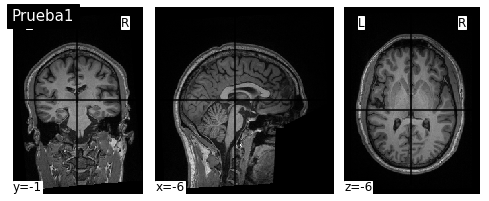

In [8]:
plotting.plot_img(img, title="Prueba1",display_mode='ortho',cmap=plt.cm.gray )
plotting.show()                

Para poder añadirle el ruido a las imágenes, vamos a transformar los datos al formato array, y tras ello guardaremos un único corte (que hemos elegido de manera aleatoria) al que realizaremos la adición. "

In [9]:
a = np.array(skimage.transform.rescale(img.dataobj,0.5))

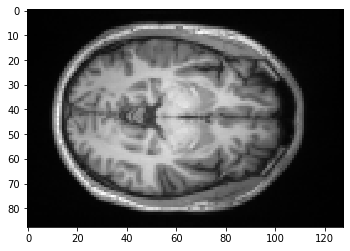

In [10]:
img_gray= a[:,:,60]
#normalizo la imagen
img_o=img_gray
img_o=img_o/np.max(img_o)
plt.imshow(img_gray, cmap=plt.cm.gray)

Llamando a la función .add_gnoise() y la función .salpimienta del módulo modules.py que hemos creado, conseguimos añadir ruido gaussiano e impulsivo a la imagen. Llamando a la función .add_gnoise() y la función .salpimienta del módulo modules.py que hemos creado, conseguimos añadir ruido gaussiano e impulsivo a la imagen. 

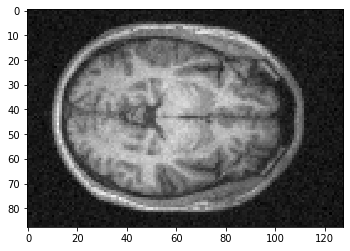

In [11]:
#Aplicar ruido gaussiano
img_gauss=modules.add_gnoise('gauss',img_o,0.03)
plt.imshow(img_gauss, cmap=plt.cm.gray)

C:\Users\nakag\OneDrive\Escritorio\IMagen\FormatoEntrega\modules.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ruido_output[pos]=1
C:\Users\nakag\OneDrive\Escritorio\IMagen\FormatoEntrega\modules.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ruido_output[pos]=0


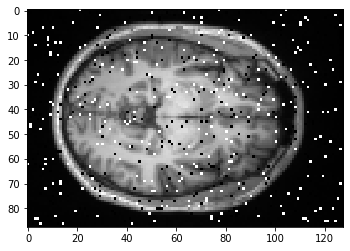

In [12]:
#Aplicar ruido impulsivo
img_salpimienta=modules.salpimienta('s&p',img_o,0.05)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)

## Filtrado Non-Local Means

(Text(0.5, 1.0, 'Mean filtered image'), (-0.5, 127.5, 87.5, -0.5))

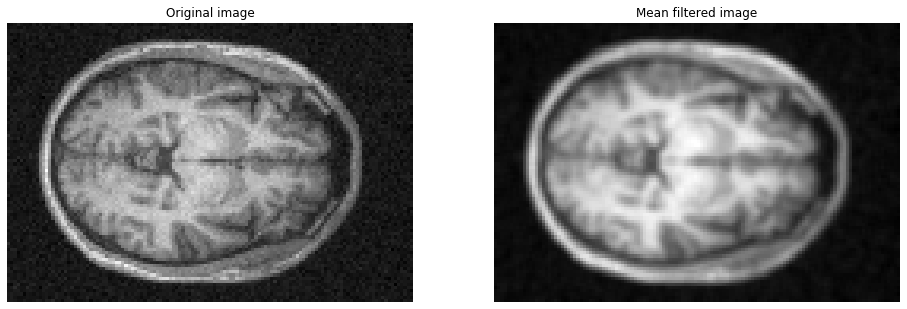

In [13]:
img_meanfiltered = modules.mean_filter(img_gauss)
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_meanfiltered, cmap=plt.cm.gray)
plt.title('Mean filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Mean filtered image'), (-0.5, 127.5, 87.5, -0.5))

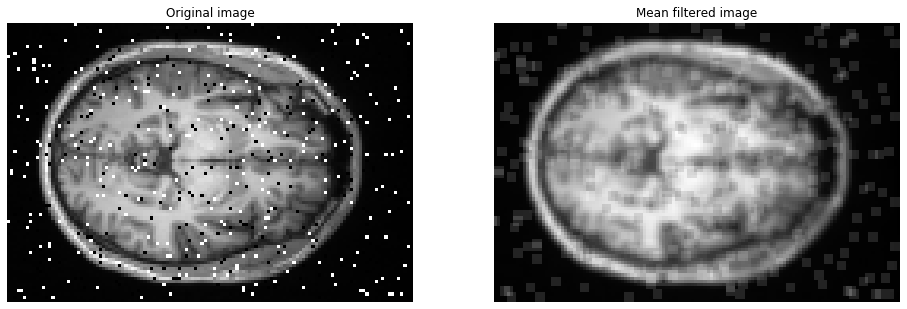

In [14]:
img_meanfiltered = modules.mean_filter(img_salpimienta)
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_meanfiltered, cmap=plt.cm.gray)
plt.title('Mean filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Median filtered image'), (-0.5, 127.5, 87.5, -0.5))

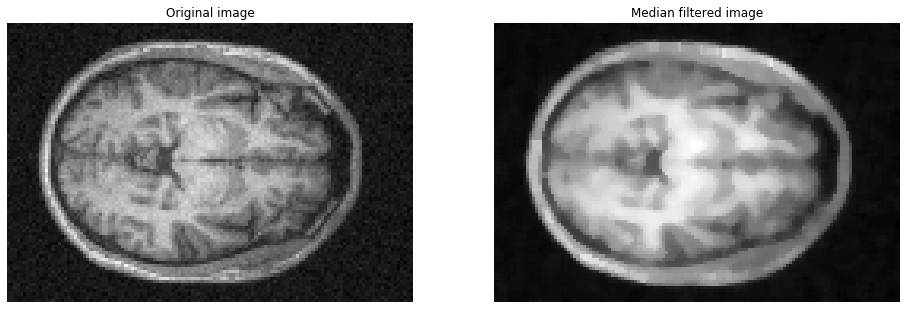

In [15]:
img_medianfiltered = modules.median_filter(img_gauss, 4)

fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_medianfiltered, cmap=plt.cm.gray)
plt.title('Median filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Median filtered image'), (-0.5, 127.5, 87.5, -0.5))

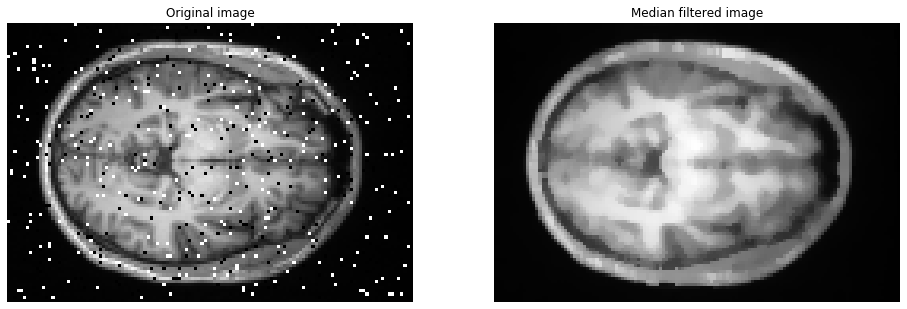

In [16]:
img_medianfiltered = modules.median_filter(img_salpimienta, 4)

fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_medianfiltered, cmap=plt.cm.gray)
plt.title('Median filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Gaussian filtered image'), (-0.5, 127.5, 87.5, -0.5))

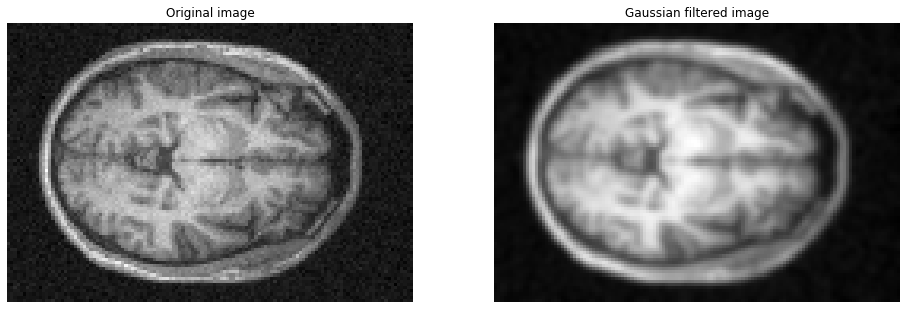

In [17]:
img_gaussianfiltered = modules.gaussian_filter(img_gauss,1)

fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_gaussianfiltered, cmap=plt.cm.gray)
plt.title('Gaussian filtered image'), plt.axis('off')

(Text(0.5, 1.0, 'Gaussian filtered image'), (-0.5, 127.5, 87.5, -0.5))

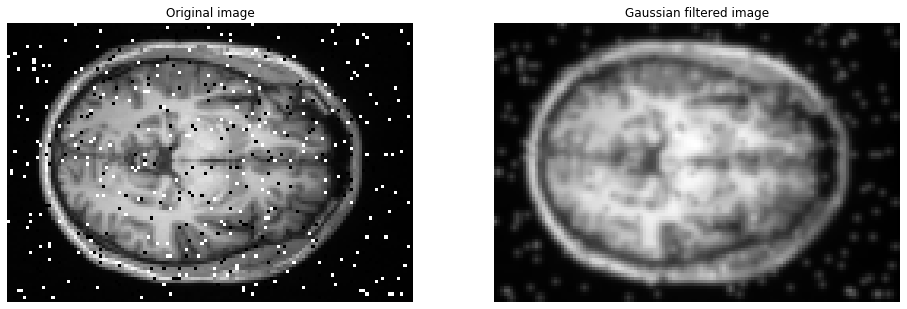

In [18]:
img_gaussianfiltered = modules.gaussian_filter(img_salpimienta,1)

fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_salpimienta, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(122)
plt.imshow(img_gaussianfiltered, cmap=plt.cm.gray)
plt.title('Gaussian filtered image'), plt.axis('off')

In [19]:
#parameters

matriz_imagen = modules.nlm(img_gauss, 1)




ValueError: setting an array element with a sequence.

In [ ]:
fig = plt.figure(figsize=(16,10))
plt.subplot(121)
plt.imshow(img_gauss,cmap=plt.cm.gray)
plt.title('Con ruido gauss, antes'), plt.axis('off')
plt.subplot(122)
plt.title('Aplicado NLM, después'), plt.axis('off')
plt.imshow(matriz_imagen, cmap=plt.cm.gray)